In [5]:
!pip install pandas numpy 
!pip install lxml

In [6]:
import numpy as np
import pandas as pd

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [7]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.

URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

tables=pd.read_html(URL)
df=tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.iloc[1:11,:]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']

df.head()

,Country,GDP (Million USD)
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882


In [8]:
print("Columnas en el DataFrame:")
print(df.columns)
print("\nPrimeras filas del DataFrame:")
print(df.head())


Columnas en el DataFrame:
Index(['Country', 'GDP (Million USD)'], dtype='object')

Primeras filas del DataFrame:
         Country GDP (Million USD)
1  United States          26854599
2          China          19373586
3          Japan           4409738
4        Germany           4308854
5          India           3736882


In [9]:
# Primero limpiamos la columna de cualquier carácter especial que pueda tener (como comas)
df['GDP (Million USD)'] = df['GDP (Million USD)'].str.replace(',', '')
# Convertimos a tipo entero
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)
# Convertimos a miles de millones
df['GDP (Million USD)'] = df['GDP (Million USD)'] / 1000
# Redondeamos a dos decimales
df['GDP (Million USD)'] = np.round(df['GDP (Million USD)'], 2)
# Renombramos la columna
df = df.rename(columns={'GDP (Million USD)': 'GDP (Billion USD)'})

print(df)

           Country  GDP (Billion USD)
1    United States           26854.60
2            China           19373.59
3            Japan            4409.74
4          Germany            4308.85
5            India            3736.88
6   United Kingdom            3158.94
7           France            2923.49
8            Italy            2169.74
9           Canada            2089.67
10          Brazil            2081.24


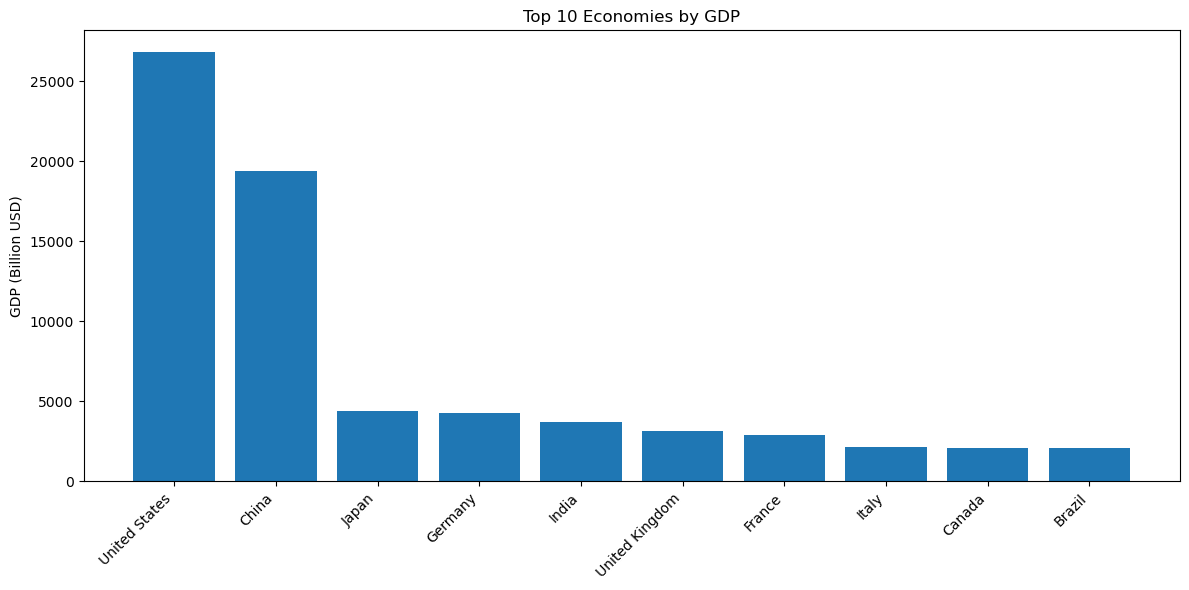

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['Country'], df['GDP (Billion USD)'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Economies by GDP')
plt.ylabel('GDP (Billion USD)')
plt.tight_layout()
plt.show()

In [11]:
# Guardamos el DataFrame en un archivo CSV
df.to_csv('Largest_economies.csv', index=False)

In [ ]:
import pandas as pd
URL = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
tables = pd.read_html(URL)
df = tables[0]
print(df)

    Rank                                Bank name  \
0      1  Industrial and Commercial Bank of China   
1      2               Agricultural Bank of China   
2      3                  China Construction Bank   
3      4                            Bank of China   
4      5                           JPMorgan Chase   
..   ...                                      ...   
95    96                         Raiffeisen Group   
96    97                            Handelsbanken   
97    98                 Industrial Bank of Korea   
98    99                                      DNB   
99   100                      Qatar National Bank   

    Total assets (2023) (US$ billion)  
0                             6303.44  
1                             5623.12  
2                             5400.28  
3                             4578.28  
4                             3875.39  
..                                ...  
95                             352.87  
96                             351.79  
97 